## Homework 02: due 22:00, Sunday, November 7, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW2), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW2.zip).
### - Submit the homework directly through the NTU COOL course website.


### 0. import essential modules

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. (35%) Work with data file _Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv_ and perform the following analysis.

##### 1.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv_ and make column 'datetime' datetime format and make it index* of the dataframe 

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [2]:
df_rain_1d = pd.read_csv("Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv")
df_rain_1d['date'] = pd.to_datetime(df_rain_1d['date'], format = '%Y/%m/%d')
df_rain_1d = df_rain_1d.set_index('date')

df_rain_1d.head(5)

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.48,2.39,2.33,2.28,2.3,2.32,2.33,2.35,2.37,2.96
1981-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


##### 1.2. (5%) Extract non-zero 1-day rainfall data.

In [3]:
df_rain_1d = df_rain_1d.replace(0, np.nan)
df_rain_1d.head(5)


,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.48,2.39,2.33,2.28,2.3,2.32,2.33,2.35,2.37,2.96
1981-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3. (5% + 10% + 10%) Calculate the quantile values, $q_p (X)$, of 1-day non-zero rainfall data for each location and for each calendar month for $p=0.75$ and $0.95$, and identify the maximum $0.75$ and $0.95$ quantiles, respectively, from all locations and the associated location IDs for each calendar month. Please export the result to a _CSV_ file named "Rain_MD-Androy-Bekily_1d-NonZero-Max-Quantiles_19810101-20210530.csv"

#### The output CSV file format shall look like the following:

Month,max_q-0.75, id_q-0.75, max_q-0.95, id_q-0.95

January,xx.xx, idddd, yy.yy, iiiidd

Feburary,ss.ss, iiddd, hh.hh, iidddd

..., ..., ..., ..., ...


In [4]:
# You may need this module for this task
import calendar

In [5]:
#df_rain_jan = df_rain_1d[df_rain_1d.index.month == 1]

#df_rain_jan

In [6]:
q75_all = []
q95_all = []
q75 = []
q95 = []

#calculate each month
for i in range(1, 13):
    df_rain_1d_EachMonth = df_rain_1d[df_rain_1d.index.month == i]
    q75 = np.nanquantile(df_rain_1d_EachMonth, 0.75, axis = 0, interpolation='nearest')
    q95 = np.nanquantile(df_rain_1d_EachMonth, 0.95, axis = 0, interpolation='nearest')
    
    q75_all = np.append(q75_all, q75, axis=0)
    q95_all = np.append(q95_all, q95, axis=0)


    

q75_all = q75_all.reshape(12, -1)
q95_all = q95_all.reshape(12, -1)
df_q75_all = pd.DataFrame(data = q75_all, columns = df_rain_1d.columns)
df_q95_all = pd.DataFrame(data = q95_all, columns = df_rain_1d.columns)
print(df_q75_all)

month = []
for month_no in range(1,13):
    each_month = np.array(calendar.month_name[month_no])
    month =np.append(month, each_month)
month.reshape(12,1)
month = pd.DataFrame(month)

df_q_all_Max = pd.concat([df_q75_all.max(axis=1), df_q75_all.idxmax(axis=1), df_q95_all.max(axis=1), df_q95_all.idxmax(axis=1), month],axis=1)
df_q_all_Max.columns = range(df_q_all_Max.shape[1])
df_q_all_Max = df_q_all_Max.rename(columns={0: 'max_q-0.75', 1: 'id_q-0.75', 2: 'max_q-0.95', 3:'id_q-0.95', 4: 'month' })
df_q_all_Max = df_q_all_Max.set_index('month')
#f_q_all_Max

fn_data_out1 = './Rain_MD-Androy-Bekily_1d-NonZero-Max-Quantiles_19810101-20210530.csv'
df_q_all_Max.to_csv(fn_data_out1, float_format='%.2f')

    1_9943  1_9944  1_10131  1_10132  1_10133  1_10134  1_10317  1_10318  \
0    16.17   15.88    16.27    16.16    16.10    15.82    16.88    16.72   
1    17.14   17.21    16.99    16.58    16.73    16.65    16.63    16.28   
2    13.07   12.99    13.05    12.96    13.00    12.91    12.73    12.74   
3     7.58    7.61     7.36     7.39     7.56     7.67     6.69     6.82   
4     6.73    6.68     6.89     6.74     6.67     6.67     6.07     6.15   
5     8.26    8.32     8.05     8.12     8.17     8.22     7.07     7.23   
6     5.44    5.46     5.47     5.45     5.41     5.40     5.22     5.24   
7     3.83    3.86     3.72     3.69     3.69     3.70     3.55     3.53   
8     4.82    4.87     4.58     4.67     4.82     4.82     4.06     4.13   
9     8.71    8.91     8.47     8.34     8.47     8.54     7.60     7.71   
10    8.90    8.75     9.02     8.88     8.79     8.77     9.10     9.11   
11   15.58   15.51    15.70    15.34    15.49    15.42    16.31    16.15   

    1_10319

### 2. (30%) Work with _Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv_, and complete the following tasks.

#### 2.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv_ and make column 'datetime' datetime format.

In [7]:
df_rain_1Ｍ = pd.read_csv("Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv")
df_rain_1Ｍ['date'] = pd.to_datetime(df_rain_1Ｍ['date'], format = '%Y/%m/%d')
df_rain_1Ｍ = df_rain_1M.set_index('date')

df_rain_1M.head(5)

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,107.64,107.00,109.60,109.00,108.36,107.74,112.52,112.02,111.53,110.98,...,155.94,156.53,157.26,158.03,158.80,159.55,160.33,161.14,161.92,154.26
1981-02-01,203.17,205.40,201.18,203.25,205.48,207.73,196.47,197.84,199.52,201.38,...,265.24,265.05,265.20,265.53,265.99,266.63,267.45,268.46,269.50,265.00
1981-03-01,76.41,76.92,76.04,76.52,77.02,77.57,75.21,75.48,75.78,76.18,...,101.60,101.05,100.57,100.19,99.86,99.51,99.15,98.89,98.71,103.31
1981-04-01,11.58,11.72,11.41,11.54,11.67,11.81,11.11,11.18,11.28,11.39,...,12.89,13.06,13.23,13.41,13.54,13.66,13.74,13.79,13.84,12.45
1981-05-01,33.44,33.49,33.04,33.11,33.19,33.25,32.28,32.42,32.57,32.68,...,19.68,19.78,19.90,20.02,20.14,20.26,20.37,20.47,20.57,19.43


#### 2.2 (10% + 10%) Assuming that Gamma distribution is a suitable distribution for the monthly rainfall, please fit the December rainfall for location '1_15823' with MLE and MoM methods and output the fitted parameters (using _print_), respectively.

In [8]:
#MLE
from scipy.stats import gamma
df_rain_1M_Dec = df_rain_1M[df_rain_1M.index.month == 12]
# df_rain_1M_Dec = df_rain_1M_Dec.loc[:, ['1_15823']]
# df_rain_1M_Dec = np.array(df_rain_1M_Dec)
df_rain_1M_Dec = df_rain_1M_Dec['1_15823']

print(df_rain_1M_Dec)

shape, loc, scale = gamma.fit(df_rain_1M_Dec, floc = 0)
print(shape, loc, scale)

date
1981-12-01    147.94
1982-12-01    191.81
1983-12-01    194.06
1984-12-01    176.18
1985-12-01    201.75
1986-12-01    264.54
1987-12-01    178.86
1988-12-01    232.46
1989-12-01    381.57
1990-12-01    196.67
1991-12-01    145.14
1992-12-01    348.08
1993-12-01    250.74
1994-12-01    182.19
1995-12-01    255.71
1996-12-01    310.95
1997-12-01    212.23
1998-12-01    316.97
1999-12-01    518.47
2000-12-01    239.66
2001-12-01    564.69
2002-12-01    278.53
2003-12-01    233.13
2004-12-01    291.36
2005-12-01    362.04
2006-12-01    302.86
2007-12-01    273.08
2008-12-01    145.74
2009-12-01    163.25
2010-12-01    447.53
2011-12-01    123.39
2012-12-01    325.45
2013-12-01    129.45
2014-12-01    246.68
2015-12-01    195.89
2016-12-01    155.20
2017-12-01    288.99
2018-12-01    204.96
2019-12-01    166.99
2020-12-01     73.99
Name: 1_15823, dtype: float64
6.388784687259429 0 38.8148156713628


In [9]:
# MoM
mean = df_rain_1M_Dec.mean()
var = df_rain_1M_Dec.var(ddof = 1)
alpha = mean**2/var
beta = var/mean
# scale = 1/beta
print(alpha, beta)

5.682145647703627 43.641876744257345


#### 2.3 (5%) Perform visual inspection on the above fitting result by plotting the histogram (with default number of bins) from the rainfall data and the pdf of fitted Gamma distribution in a single plot. 

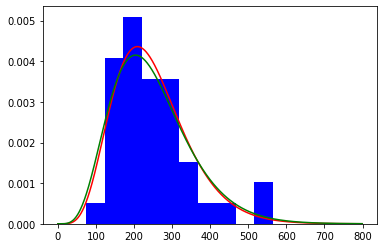

In [10]:

# df_rain_1M_Dec.pmf.plot(kind = 'bar')
x = np.linspace(0, 800, 800)
plt.hist(df_rain_1M_Dec, density=True, color='blue')
pdf1 = plt.plot(gamma.pdf(x, 6.389, loc=0, scale =38.815), color = 'red')
pdf2 = plt.plot(gamma.pdf(x, 5.682, loc=0, scale =43.642), color = 'green')

### 3. (35%) The generalised Pareto distribution (GPD) is a 3-parameter continuous distribution. It is famous for it 'fat' tail and is largely used fot extreme risk modelling. 

#### The probability density function (PDF) of GPD is termed:

$f(x) = \frac{1}{\sigma}(1+\kappa z)^{-1(\frac{1}{\kappa}+1)}$

#### And the cumulative density function (CDF) is termed:

$F(x) = 1-(1+\kappa z)^{-\frac{1}{\kappa}}$

#### where $z = \frac{x-\mu}{\sigma}$, and $\mu$, $\sigma$ and $\kappa$ are _location_, _scale_ and _shape_ parameters, respectively.


#### 3.1 (10% + 5%) __Without using Scipy or other similar stats libraries__, please implement two functions named _gpd_rvs_ and _gpd_pdf_. The _gpd_rvs_ function can be used to sample a GPD-distributed random variate, whilst the _gpd_pdf_ function is used to model the pdf of the GPD.

In [11]:
# You may need these modules for this task
import random as rnd
import math

In [12]:
# Function to to sample GPD-distributed random variates
def gpd_rvs(mu, sigma, k):
    """Return a GPD-distributed random variate"""
    cdf = rnd.random()
    x = (((1-cdf)**(-k))-1)*(sigma/k)+mu
    
    return x

In [13]:
# Function to model GPD pdf
def gpd_pdf(x, mu, sigma, k):
    """Return a GPD density function value random variate"""
    sample_num = 0
    gpd_all = []
    for sample_num in range(len(random_sample)):
        
        gpd = (1+k*((x[sample_num]-mu)/sigma))**((-1)*((1/k)+1))*(1/sigma)
        gpd_all = np.append(gpd_all, gpd)
        
    return gpd_all

#### 3.2. (5%) Sample 250 GPD-distributed random variates using the _gpd_rvs_ function with the input parameters μ=2, σ=0.5 and k=1.2.

In [14]:
sample_no = 0
random_sample = []
for sample_no in range(0, 250):
    each_gpd_rvs = gpd_rvs(2, 0.5, 1.2)
    random_sample = np.append(random_sample, each_gpd_rvs)
random_sample = np.array(random_sample)
random_sample = sorted(random_sample)

#### 3.3 (5% + 5%) Create a histogram plot for these sampled values using a fixed bin width $\nu$, which can be derived with the equation below.

$\nu=3.49sN^{-1/3}$

#### where $N$ is the number of data and $s$ is the sample standard deviation computed from data.

In [15]:
# Compute the bin width and number of bins
std = np.std(random_sample)
N = 250
v = 3.49*std*(N**-(1/3))
rng = np.max(random_sample) - np.min(random_sample)
bin_no = int(np.ceil(rng/v))
bin_no


21

(array([0.04992222, 0.00105767, 0.0006346 , 0.00042307, 0.        ,
        0.        , 0.        , 0.00021153, 0.00021153, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00021153, 0.        , 0.        , 0.        ,
        0.00021153]),
 array([  2.00617993,  20.91559683,  39.82501372,  58.73443061,
         77.6438475 ,  96.55326439, 115.46268128, 134.37209817,
        153.28151507, 172.19093196, 191.10034885, 210.00976574,
        228.91918263, 247.82859952, 266.73801641, 285.6474333 ,
        304.5568502 , 323.46626709, 342.37568398, 361.28510087,
        380.19451776, 399.10393465]),
 <BarContainer object of 21 artists>)

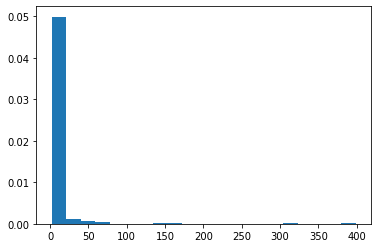

In [16]:
# Plot histogram
plt.hist(random_sample, bins= bin_no, density=True)

#### 3.4. (5%) Perform visual inspection by creating a line plot using the _gpd_pdf_ function with parameters μ=2, σ=0.5 and k=1.2, and add this line plot to the above histogram plot.    

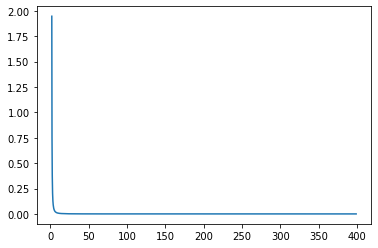

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(random_sample, gpd_pdf(random_sample, 2, 0.5, 1.2))

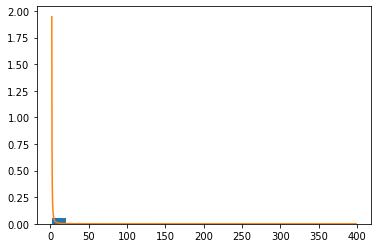

In [18]:
plt.hist(random_sample, bins= bin_no, density=True)
plt.plot(random_sample, gpd_pdf(random_sample, 2, 0.5, 1.2))
